In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [56]:
df =pd.read_csv("Bengaluru_House_Data.csv")

In [57]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [58]:
df.shape

(13320, 9)

In [59]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [60]:
df1 = df.drop(['society', 'balcony','availability'], axis = 1 )

In [61]:
df1.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [62]:
df1.shape

(13320, 6)

In [63]:
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [64]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [65]:
df2 = df1.dropna()
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [66]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [67]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-67-eadc3504d97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [68]:
df2.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [69]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [70]:
df2.bhk.value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: bhk, dtype: int64

In [71]:
df2[df2.bhk>25]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [72]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [73]:
df2.total_sqft.value_counts()

1200       843
1100       221
1500       204
2400       195
600        180
          ... 
1452.19      1
1879         1
3628         1
1748         1
2079         1
Name: total_sqft, Length: 2067, dtype: int64

In [74]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [75]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [76]:
def convert_sqft_to_num(x):
    token =x.split('-' )
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
        
    try:
        return float(x)
    except:
        return None

In [77]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)


In [78]:
df3.head(10)

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Plot Area,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [79]:
df3.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                    2475
bath                             4
price                          186
bhk                              4
Name: 30, dtype: object

In [80]:
#feature Engineering

In [81]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
    

In [82]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.location.value_counts().sort_values(ascending =False)


In [83]:
len(location_stats[location_stats<=1])

472

In [84]:
location_less_than_2 = location_stats[location_stats<=1]

In [85]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_less_than_2 else x)

In [86]:
df4.location.value_counts()

Whitefield         535
other              472
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
                  ... 
Janatha Colony       2
Shanthi Layout       2
Infantry Road        2
Nanjappa Garden      2
Mariyannapalya       2
Name: location, Length: 822, dtype: int64

In [87]:
len(df4.location.value_counts())

822

In [88]:
df4.shape

(13246, 8)

In [89]:
df5 =df4[~(df4.total_sqft/df4.bhk<300)]

In [90]:
df5.shape

(12502, 8)

In [91]:
df5.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [92]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [93]:
 #Outlier remover
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out   
                                                                            

In [94]:
df6 = remove_pps_outliers(df5)


In [95]:
df6.shape

(9597, 8)

In [96]:
def plot_scater_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3BHK', s = 50,)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

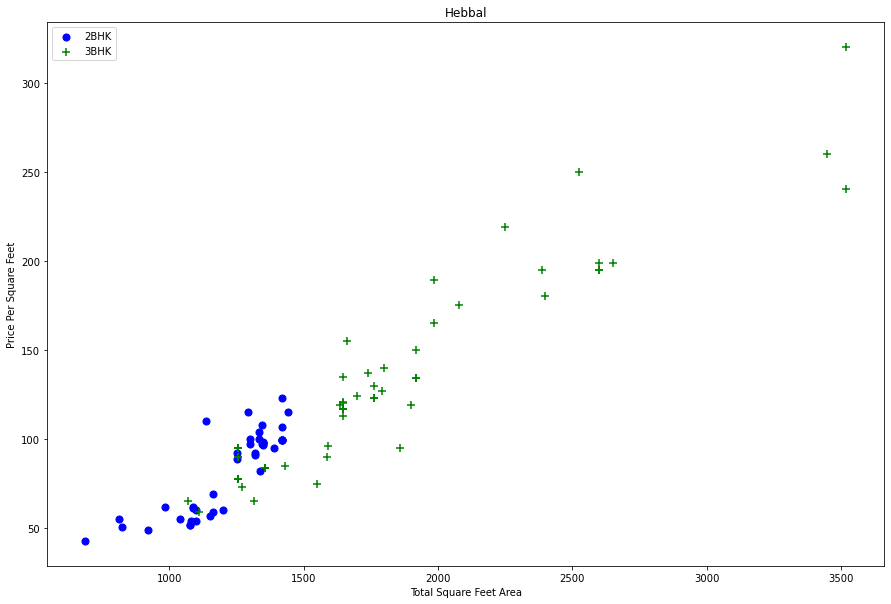

In [97]:
plot_scater_chart(df6,"Hebbal")

In [98]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0] 
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

In [99]:
df7 = remove_bhk_outliers(df6)

In [100]:
df7.shape

(7677, 8)

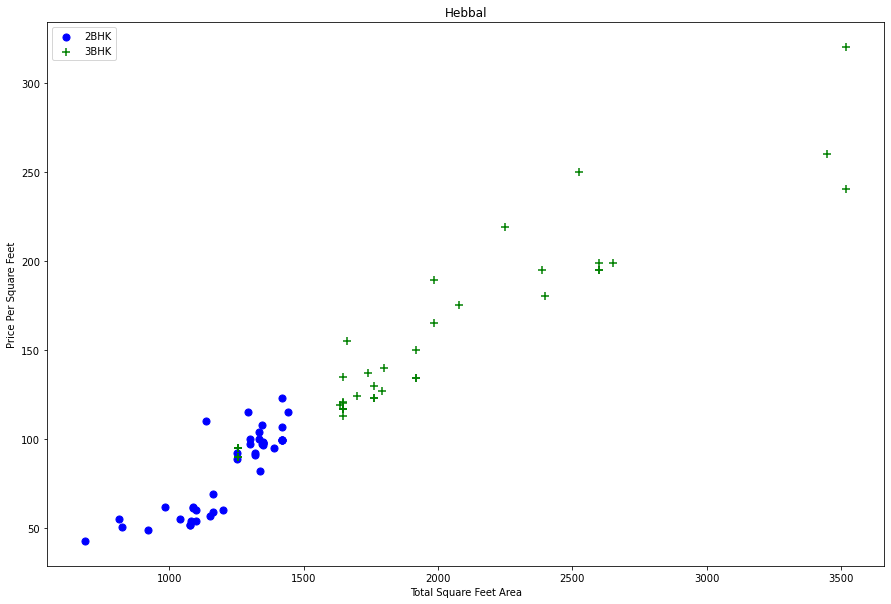

In [101]:
plot_scater_chart(df7,"Hebbal")

In [102]:
df7.to_csv('data_cleaned.csv')